In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import os

# Load data
train_files_healthy = "plant dataset/Train/Train/Healthy"
train_files_powdery = "plant dataset/Train/Train/Powdery"
train_files_rust = "plant dataset/Train/Train/Rust"

test_files_healthy = "plant dataset/Test/Test/Healthy"
test_files_powdery = "plant dataset/Test/Test/Powdery"
test_files_rust = "plant dataset/Test/Test/Rust"

valid_files_healthy = "plant dataset/Validation/Validation/Healthy"
valid_files_powdery = "plant dataset/Validation/Validation/Powdery"
valid_files_rust = "plant dataset/Validation/Validation/Rust"

# Define function to count total files in a folder
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

# Print number of files in each category
print("Number of healthy leaf images in training set:", total_files(train_files_healthy))
print("Number of powdery leaf images in training set:", total_files(train_files_powdery))
print("Number of rusty leaf images in training set:", total_files(train_files_rust))

print("========================================================")

print("Number of healthy leaf images in test set:", total_files(test_files_healthy))
print("Number of powdery leaf images in test set:", total_files(test_files_powdery))
print("Number of rusty leaf images in test set:", total_files(test_files_rust))

print("========================================================")

print("Number of healthy leaf images in validation set:", total_files(valid_files_healthy))
print("Number of powdery leaf images in validation set:", total_files(valid_files_powdery))
print("Number of rusty leaf images in validation set:", total_files(valid_files_rust))

# Data Augmentation and Loading
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('plant dataset/Train/Train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('plant dataset/Test/Test',
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode='categorical')

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False)

# Add custom layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(3, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])




Number of healthy leaf images in training set: 458
Number of powdery leaf images in training set: 430
Number of rusty leaf images in training set: 434
Number of healthy leaf images in test set: 50
Number of powdery leaf images in test set: 50
Number of rusty leaf images in test set: 50
Number of healthy leaf images in validation set: 20
Number of powdery leaf images in validation set: 20
Number of rusty leaf images in validation set: 20
Found 1322 images belonging to 3 classes.
Found 150 images belonging to 3 classes.





In [2]:
# Train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

# Save the model
model.save("plant_disease_detection_resnet50.h5")

Epoch 1/10


42/42 [==============================] - 261s 6s/step - loss: 1.2688 - accuracy: 0.3540 - val_loss: 1.0768 - val_accuracy: 0.4000
Epoch 2/10
42/42 [==============================] - 252s 6s/step - loss: 1.1339 - accuracy: 0.3918 - val_loss: 1.1093 - val_accuracy: 0.3467
Epoch 3/10
42/42 [==============================] - 247s 6s/step - loss: 1.1585 - accuracy: 0.3631 - val_loss: 1.0769 - val_accuracy: 0.4333
Epoch 4/10
42/42 [==============================] - 236s 6s/step - loss: 1.0780 - accuracy: 0.3880 - val_loss: 1.0509 - val_accuracy: 0.4000
Epoch 5/10
42/42 [==============================] - 224s 5s/step - loss: 1.0431 - accuracy: 0.4569 - val_loss: 1.0329 - val_accuracy: 0.4667
Epoch 6/10
42/42 [==============================] - 232s 6s/step - loss: 1.0471 - accuracy: 0.4697 - val_loss: 1.0458 - val_accuracy: 0.3867
Epoch 7/10
42/42 [==============================] - 234s 6s/step - loss: 1.0219 - accuracy: 0.4682 - val_loss: 0.9727 - val_accuracy: 0.5467
Epoch 8/10


C:\Users\Rahul Singh\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


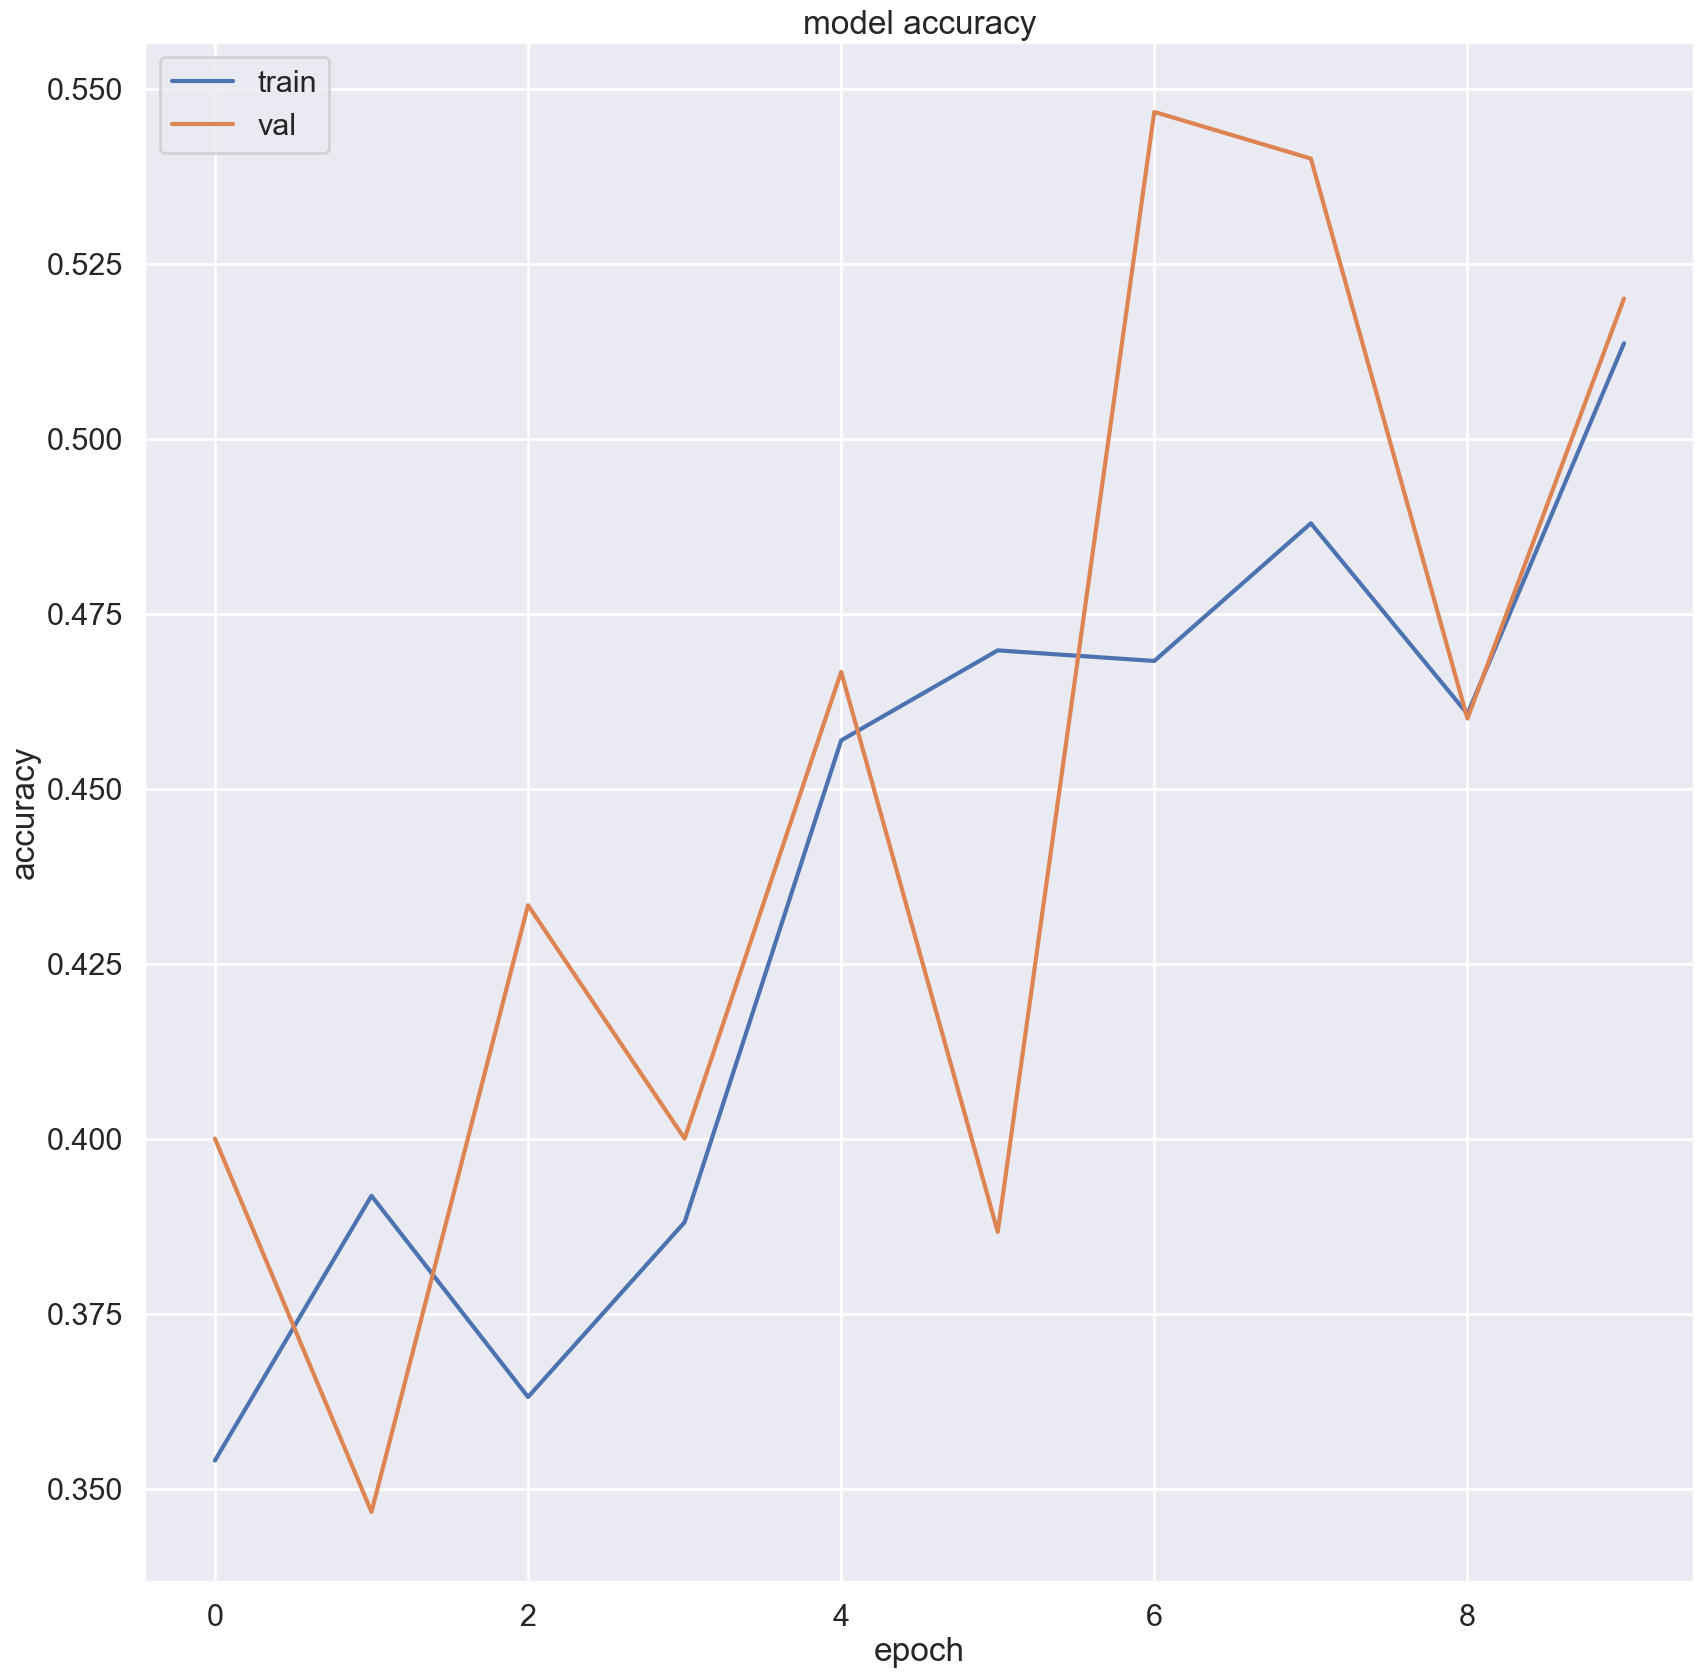

In [3]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

sns.set_theme()
sns.set_context("poster")

figure(figsize=(20, 20), dpi=100)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

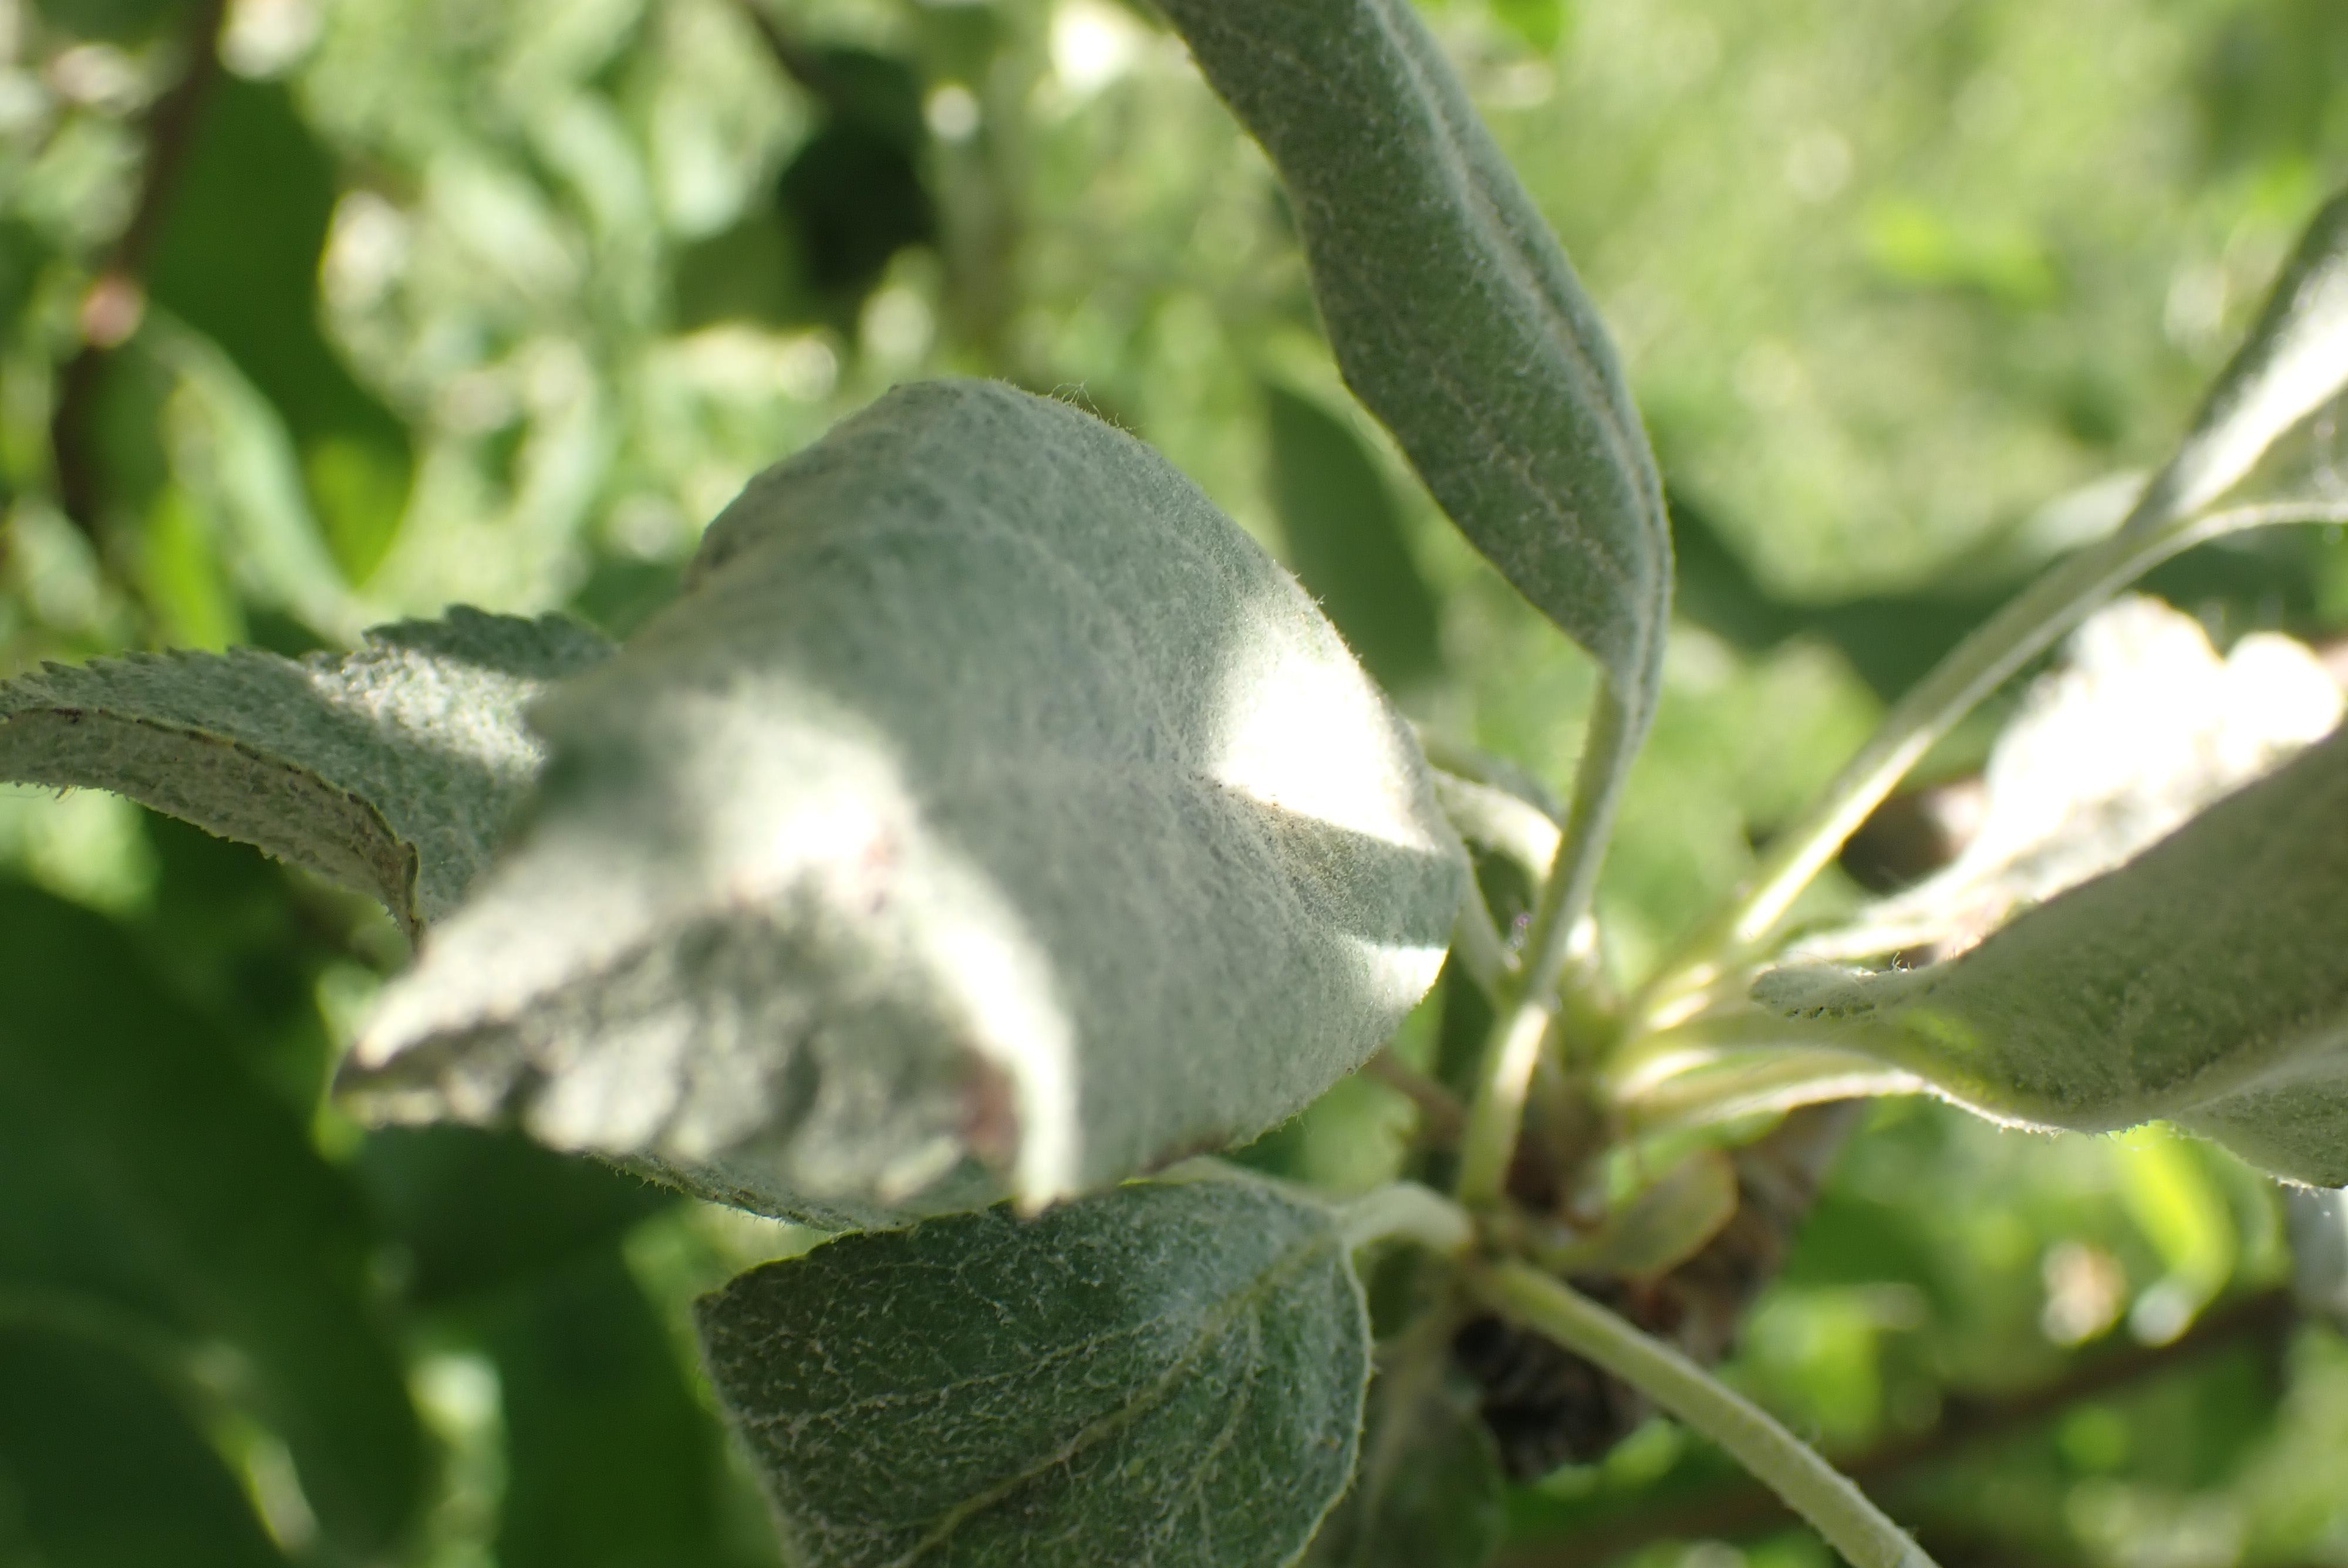

In [4]:
from PIL import Image
import IPython.display as display

image_path = 'plant dataset/Test/Test/Powdery/81f43097df3940d7.jpg'


with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

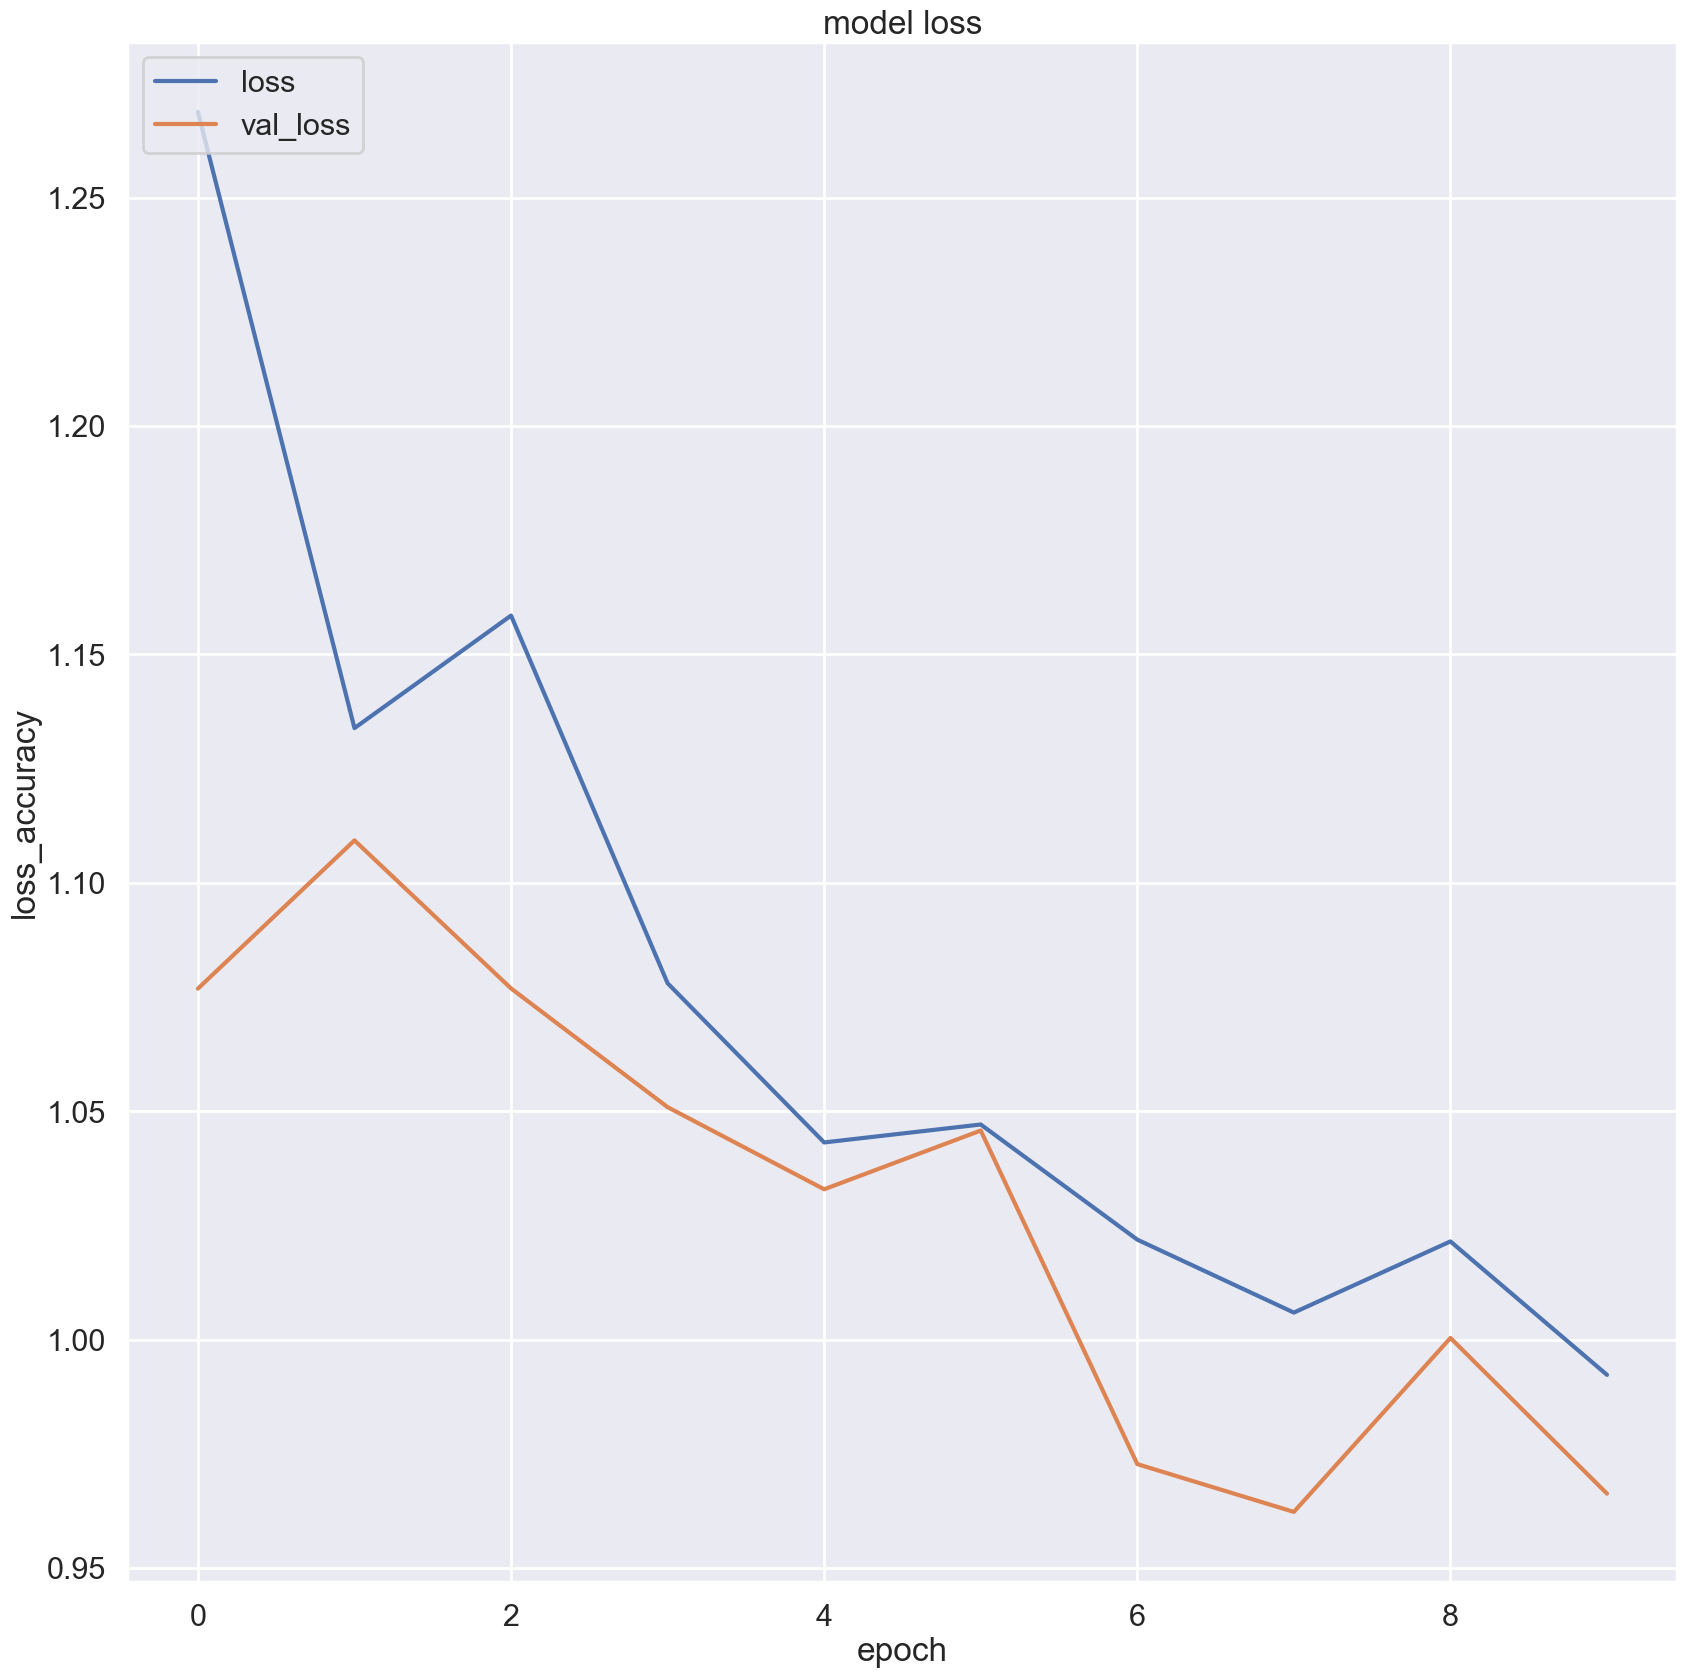

In [5]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

import seaborn as sns

sns.set_theme()
sns.set_context("poster")

figure(figsize=(20, 20), dpi=100)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss_accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

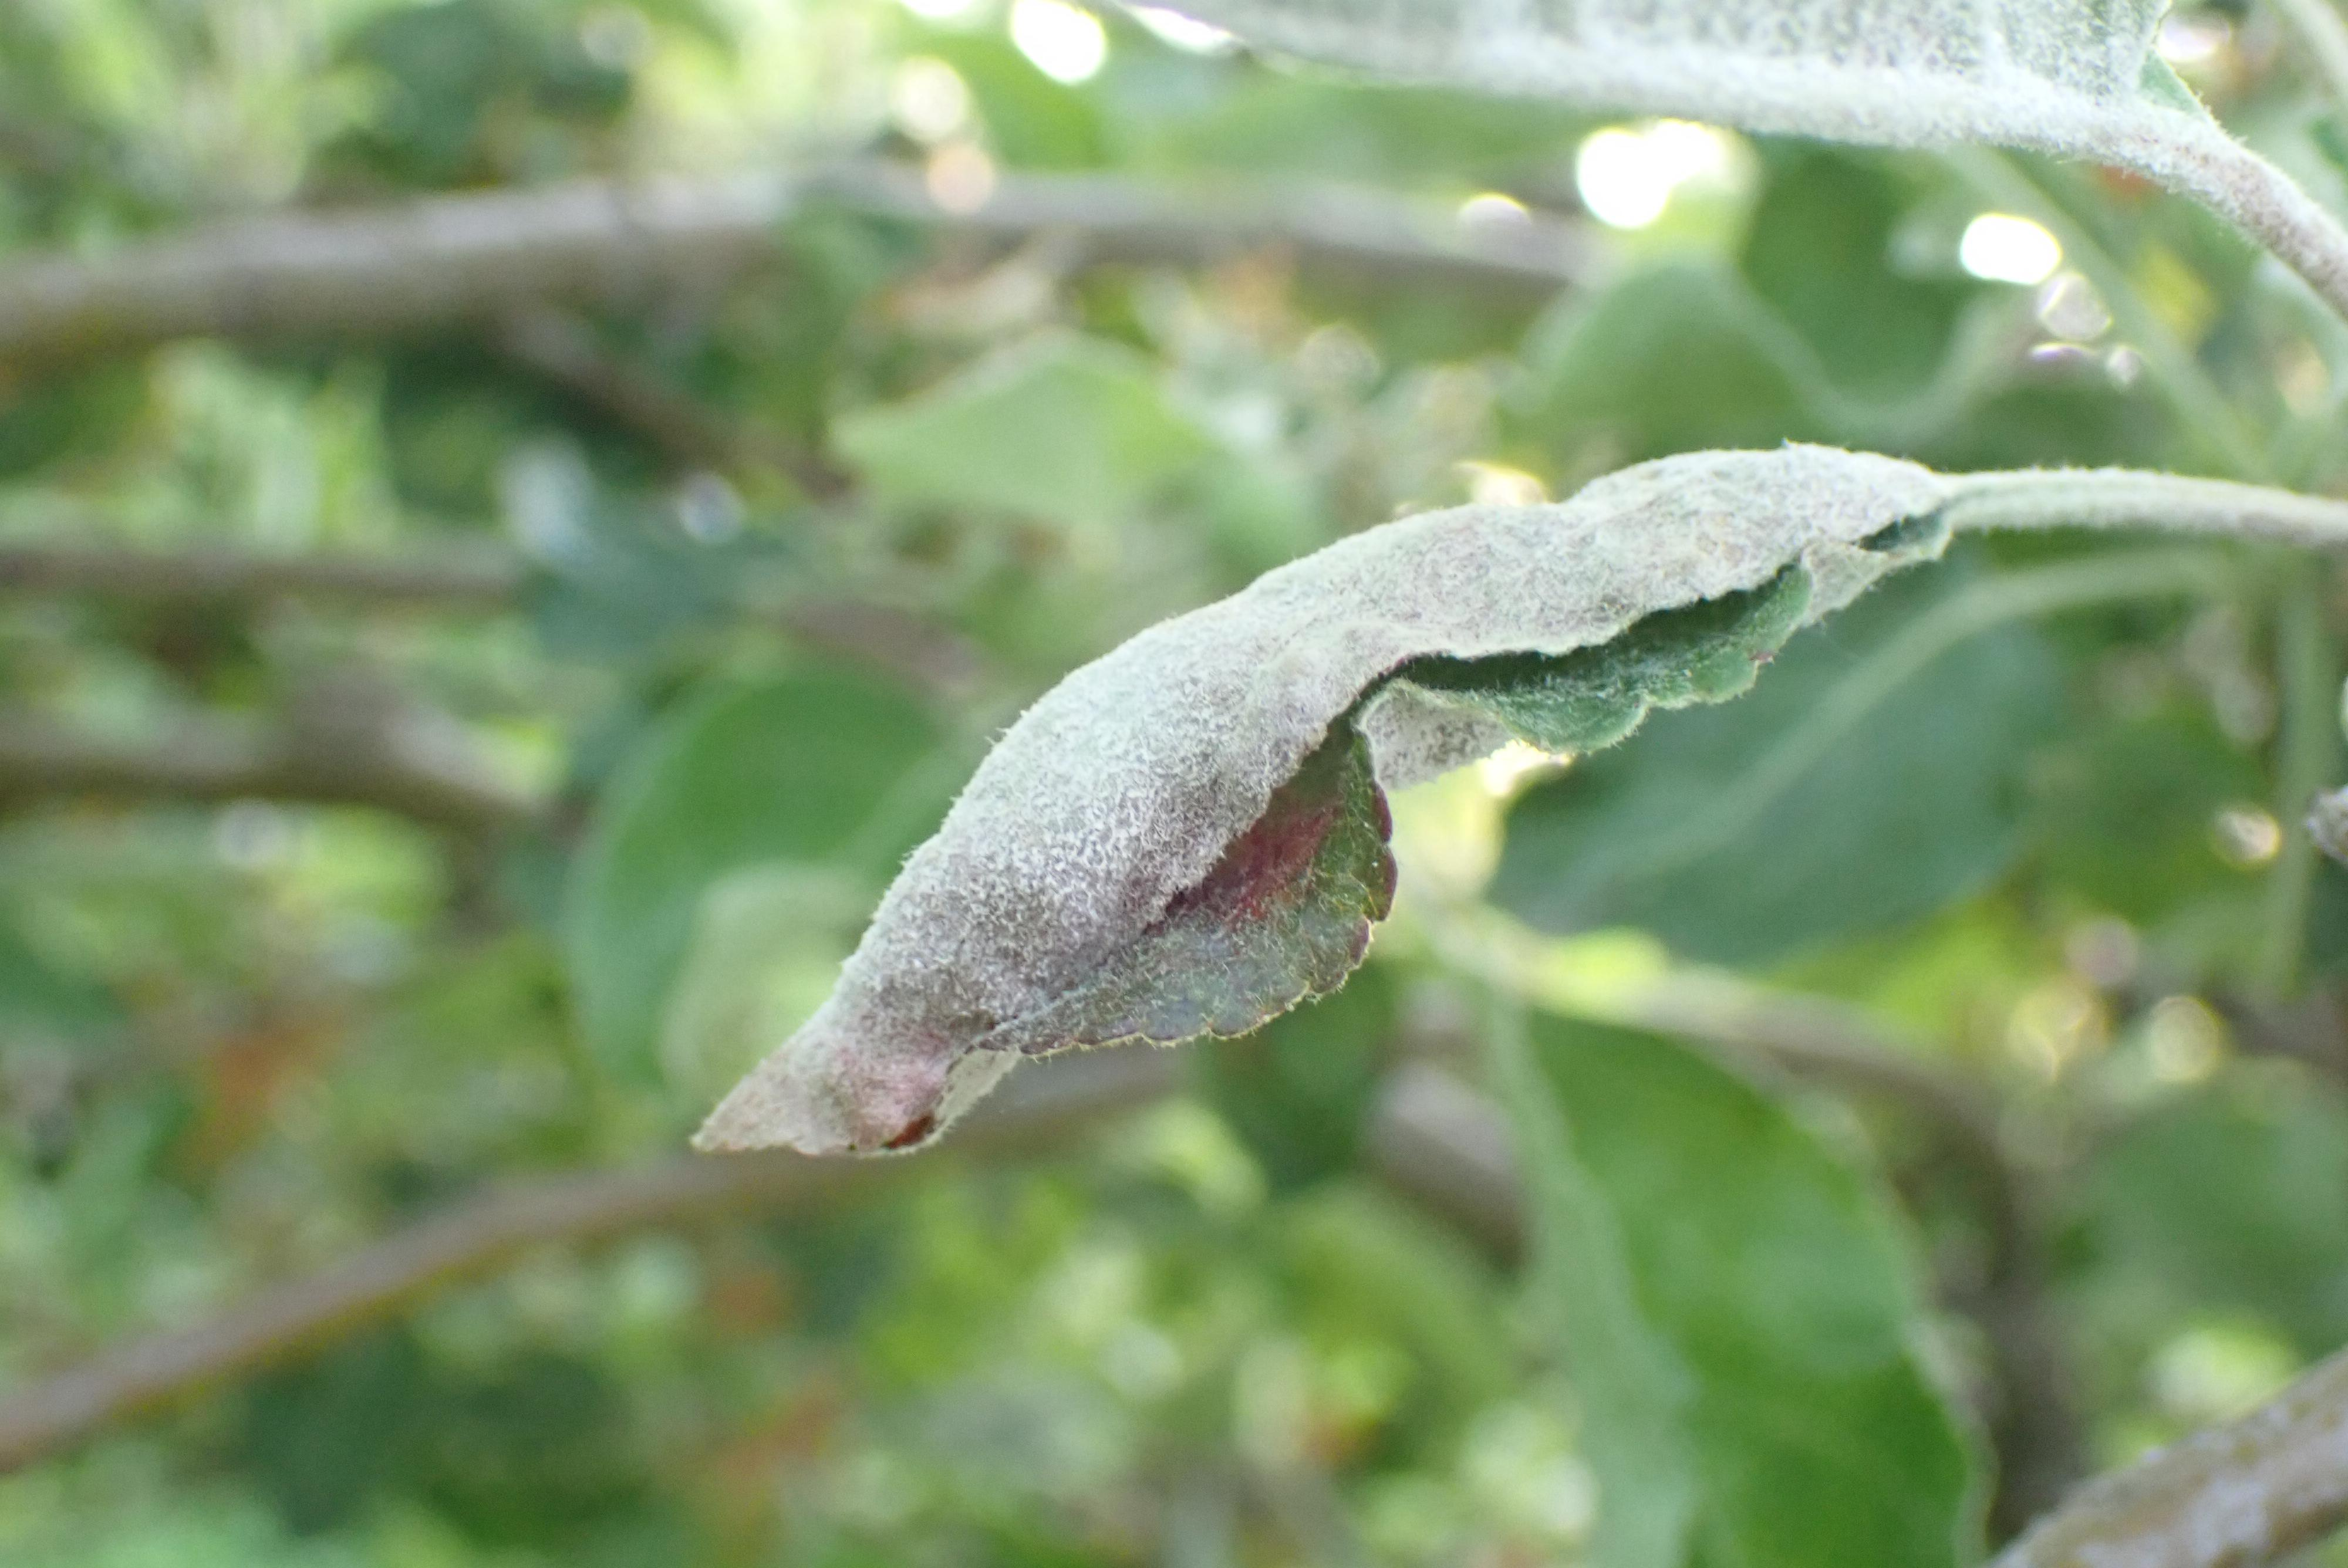

In [6]:
image_path = 'plant dataset/Test/Test/Powdery/9e84aee68691979c.jpg'


with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, None, None, 64)       16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, None, None, 64)       256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, None, None, 64)       0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, None, None, 512)      66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, None, None, 512)      2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, None, None, 512)      0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, None, None, 256)      590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, None, None, 256)      1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, None, None, 256)      0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, None, None, 1024)     525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, None, None, 1024)     0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, None, None, 256)      262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, None, None, 256)      1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, None, None, 1024)     4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, None, None, 1024)     0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, None, None, 1024)     0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, None, None, 512)      0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, None, None, 512)      2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, None, None, 512)      2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, None, None, 512)      0         ['conv5_block3_2_bn[0][0]']   
 ation)   

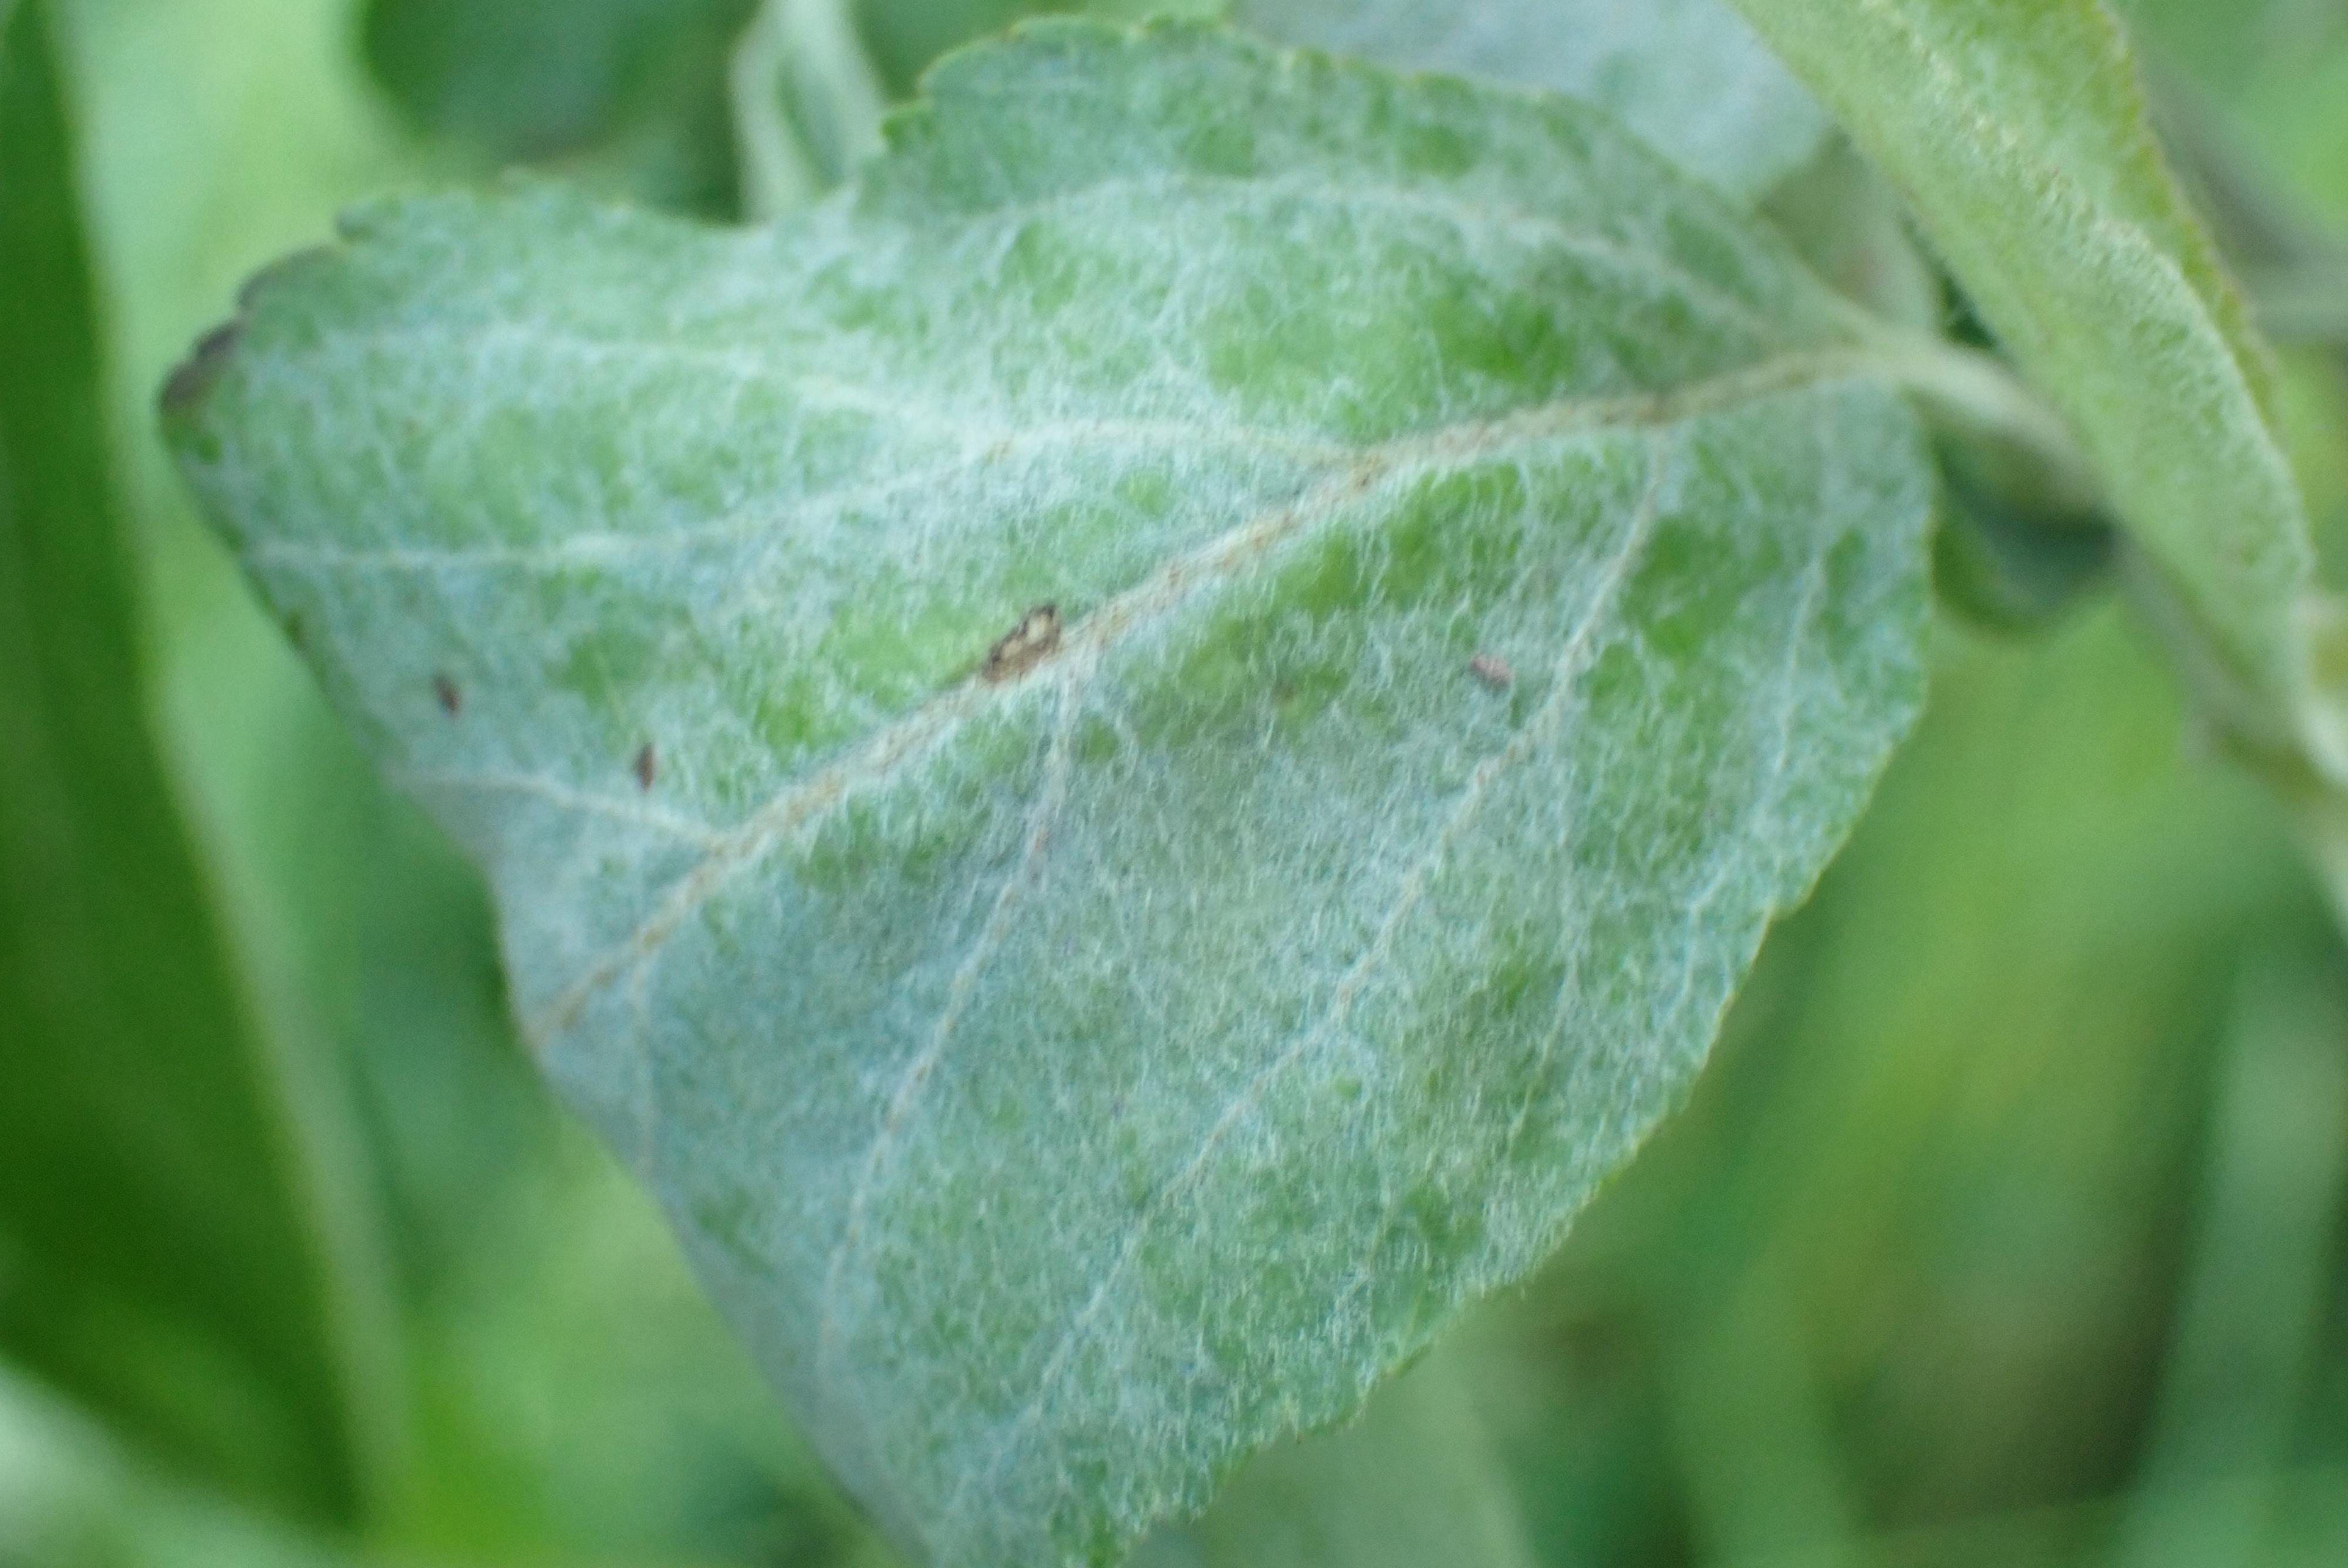

In [8]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np


def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x


x = preprocess_image('plant dataset/Test/Test/Powdery/80bc7d353e163e85.jpg')
image_path  = 'plant dataset/Test/Test/Powdery/80bc7d353e163e85.jpg'


with open(image_path, 'rb') as f:
    display.display(display.Image(data=f.read(), width=500))

In [9]:
predictions = model.predict(x)
predictions[0]

1/1 [==============================] - 1s 1s/step


array([9.9853945e-01, 1.2544941e-04, 1.3351024e-03], dtype=float32)

In [10]:
labels = train_generator.class_indices
labels = {v: k for k, v in labels.items()}
print(labels)

{0: 'Healthy', 1: 'Powdery', 2: 'Rust'}


In [11]:
predicted_label = labels[np.argmax(predictions)]
print(predicted_label)


Healthy


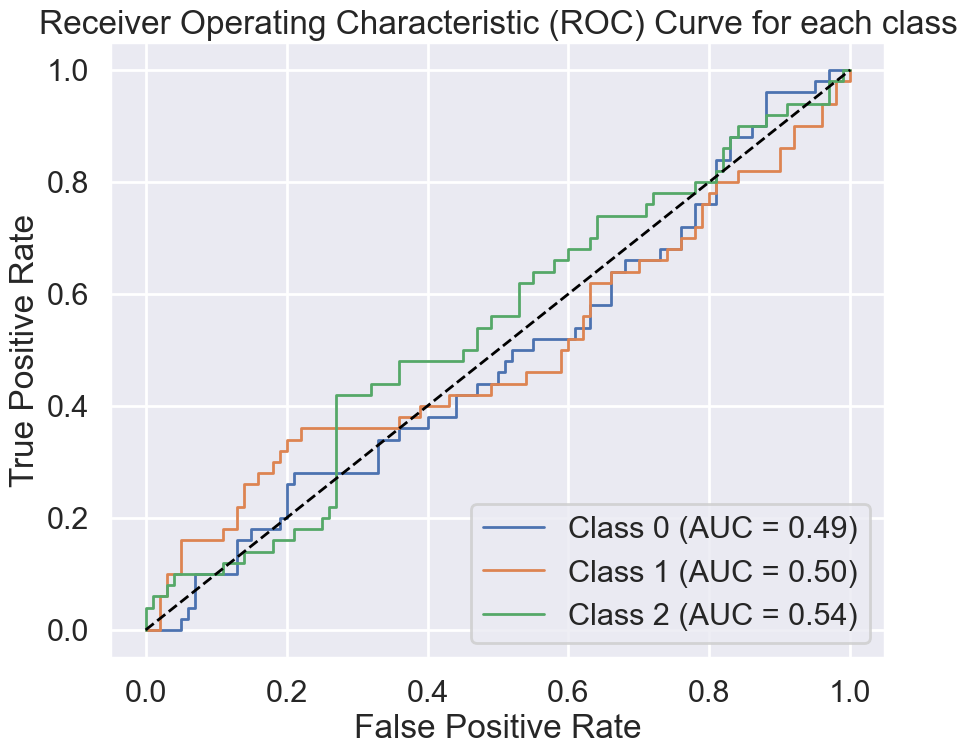

Average AUC-ROC: 0.5066


In [13]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the true labels
true_labels_bin = label_binarize(true_labels, classes=np.unique(true_labels))

# Calculate AUC-ROC for each class
auc_roc = []
for i in range(true_labels_bin.shape[1]):
    auc_roc.append(roc_auc_score(true_labels_bin[:, i], predictions[:, i]))

# Plot AUC-ROC for each class
plt.figure(figsize=(10, 8))
for i in range(true_labels_bin.shape[1]):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], predictions[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {auc_roc[i]:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='black', lw=2)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend(loc="lower right")
plt.show()

# Average AUC-ROC across all classes
average_auc_roc = np.mean(auc_roc)
print("Average AUC-ROC:", average_auc_roc)

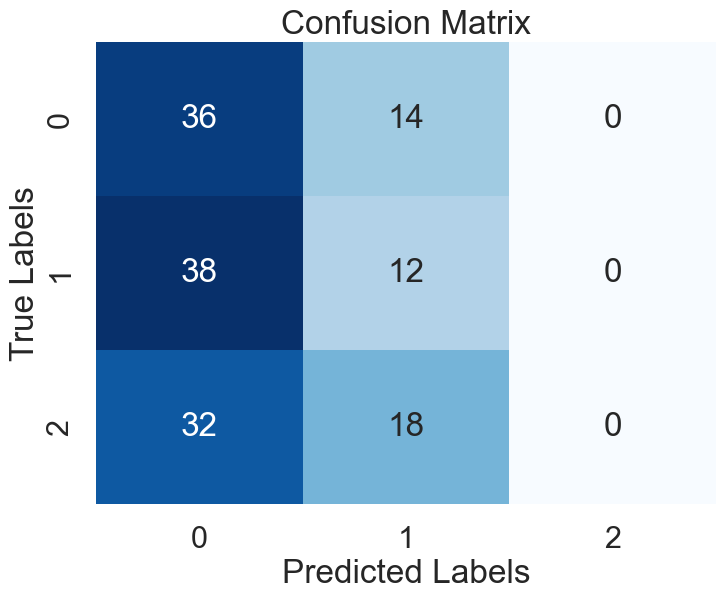

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


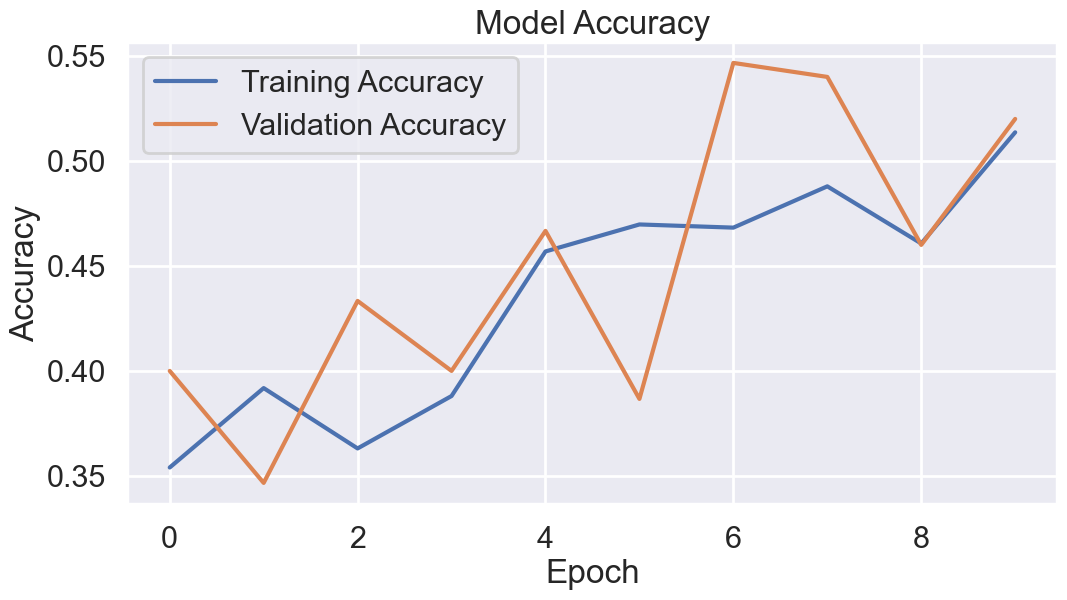

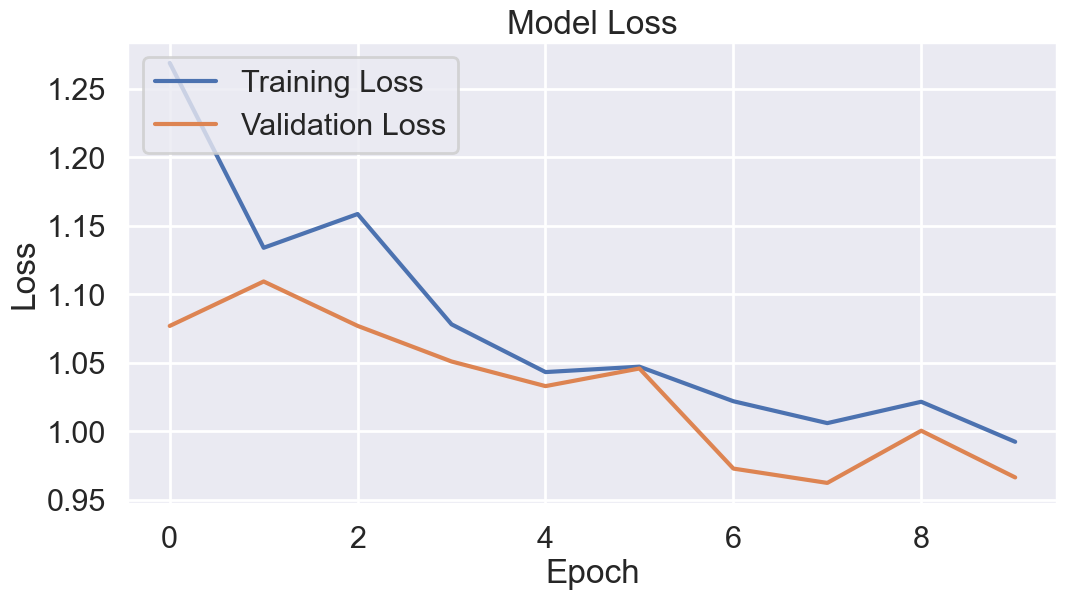

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')
plt.show()

In [14]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(validation_generator)
print('Test Accuracy:', test_accuracy)

5/5 [==============================] - 21s 4s/step - loss: 0.9663 - accuracy: 0.5200
Test Accuracy: 0.5199999809265137


5/5 [==============================] - 21s 4s/step


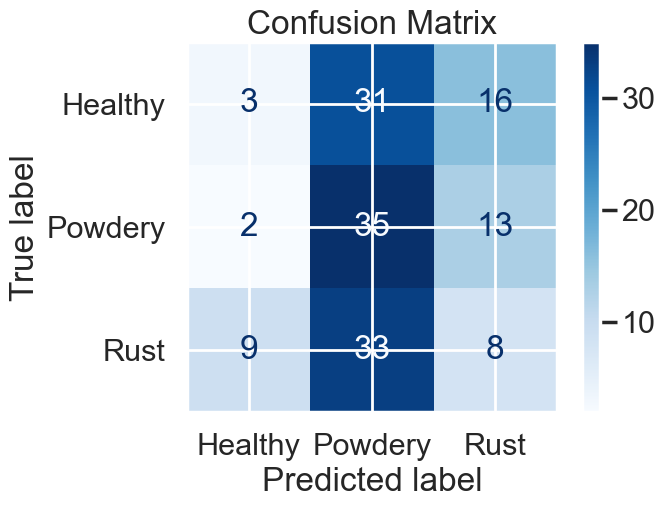

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer

# Make predictions on the test data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels from the test generator
y_true = validation_generator.classes

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(validation_generator.class_indices.keys()))

# Plot the confusion matrix
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [16]:
from sklearn.metrics import classification_report

# Make predictions on the validation (test) data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels from the validation generator
y_true = validation_generator.classes

# Generate the classification report
class_labels = list(validation_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)
print(report)

5/5 [==============================] - 20s 4s/step
              precision    recall  f1-score   support

     Healthy       0.21      0.06      0.09        50
     Powdery       0.34      0.68      0.46        50
        Rust       0.38      0.28      0.32        50

    accuracy                           0.34       150
   macro avg       0.31      0.34      0.29       150
weighted avg       0.31      0.34      0.29       150



5/5 [==============================] - 21s 4s/step


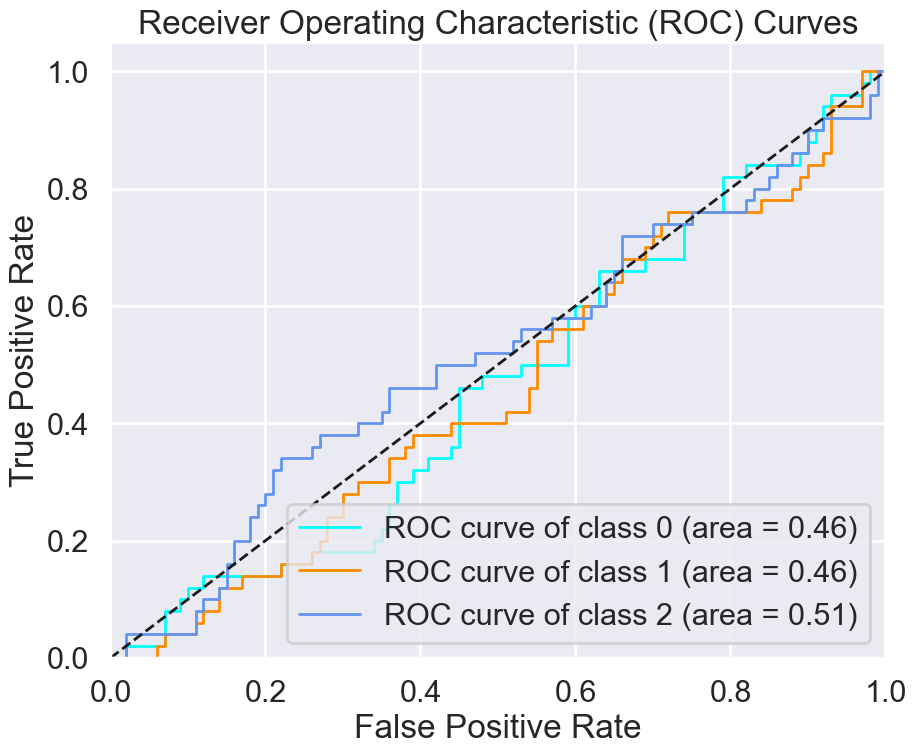

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Make predictions on the validation (test) data
Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

# Get true labels from the validation generator
y_true = validation_generator.classes

# Binarize the output labels for multi-class ROC
n_classes = len(validation_generator.class_indices)
y_true_bin = label_binarize(y_true, classes=list(range(n_classes)))
y_pred_bin = label_binarize(y_pred, classes=list(range(n_classes)))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], Y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'darkred', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()